## Matplotlib and Seaborn Part I 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')

print(pokemon.shape)

pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


### 1. Bar Charts

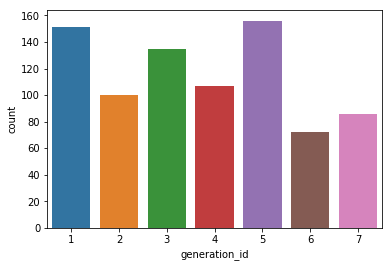

In [3]:
sb.countplot(data = pokemon, x = 'generation_id')

# it's better to plot everything in one color to avoid being distracted

In [7]:
base_color = sb.color_palette()[0]

- Change the Color

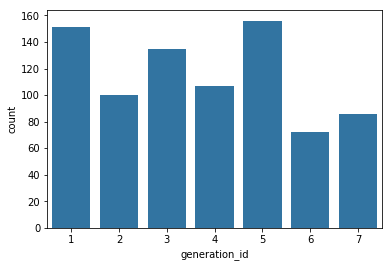

In [8]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

- Order 

In [10]:
gen_order = pokemon['generation_id'].value_counts().index

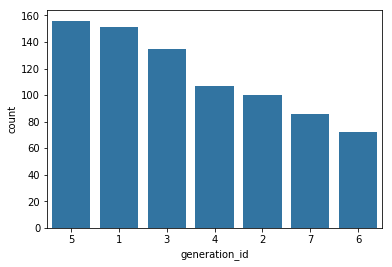

In [11]:
sb.countplot(data = pokemon, x = 'generation_id', color = base_color,
             order = gen_order)

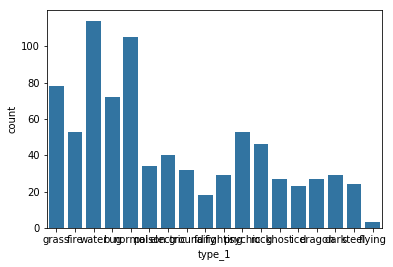

In [12]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

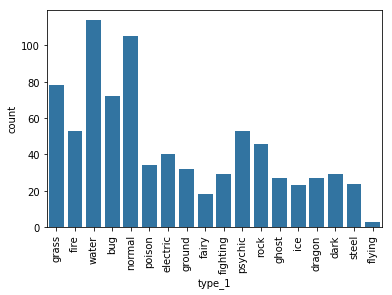

In [19]:
# fix the overlapping labels

sb.countplot(data = pokemon, x = 'type_1', color = base_color)
plt.xticks(rotation = 90)

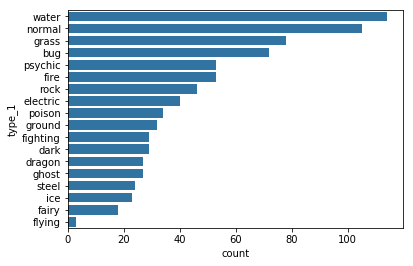

In [18]:
# set vertical and ordered
type_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = base_color,
            order = type_order)

### 2. Absolute vs. Relative Frequency 

- Create a relative frequency plot of the proportion of Pokémon with each type, sorted from most frequent to least. The sum across bars should be greater than 100%, since many Pokémon have two types.

In [53]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Text(0.5,0,'proportion')

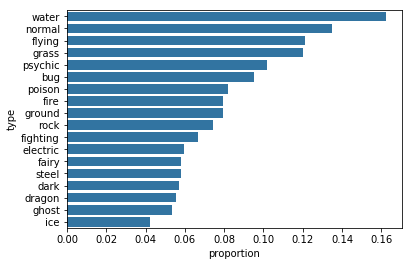

In [54]:
# get order of bars by frequency
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

# compute largest proportion
n_pokemon = pkmn_types['species'].unique().shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon

# establish tick locations and create plot
base_color = sb.color_palette()[0]
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')



### 3. Counting Missing Data

In [42]:
pokemon.isna().sum()

id                   0
species              0
generation_id        0
height               0
weight               0
base_experience      0
type_1               0
type_2             402
hp                   0
attack               0
defense              0
speed                0
special-attack       0
special-defense      0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

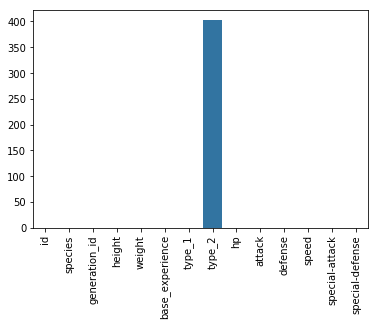

In [48]:
na_counts = pokemon.isna().sum()
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90)

### 4. Bar Charts
- Showing how the data is broken down into parts (relative frequencies)
- Plotting a small number of slices (two or three)

(-1.1007273826404005,
 1.100389688455406,
 -1.100707746536808,
 1.1004093245589985)

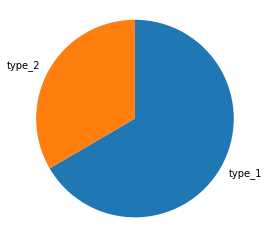

In [55]:
sorted_counts = pkmn_types['type_level'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False);
plt.axis('square')

(-1.1007273826404005,
 1.100389688455406,
 -1.100707746536808,
 1.1004093245589985)

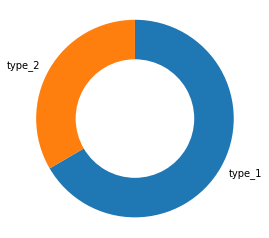

In [56]:
# donut plot
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square')

### 5. Histograms

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <a list of 10 Patch objects>)

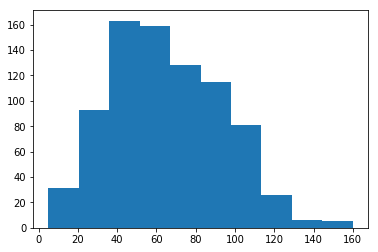

In [58]:
plt.hist(data = pokemon, x = 'speed')

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <a list of 20 Patch objects>)

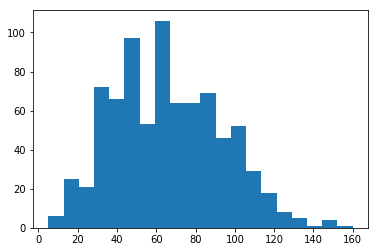

In [59]:
# set the bins
plt.hist(data = pokemon, x = 'speed', bins = 20)

(array([ 0.,  3.,  4., 11., 19., 18., 43., 38., 57., 46., 53., 48., 62.,
        55., 53., 27., 45., 32., 39., 42., 36., 22., 18., 12.,  8.,  5.,
         5.,  0.,  1.,  1.,  3.,  1.]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160]),
 <a list of 32 Patch objects>)

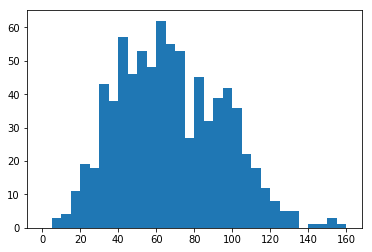

In [60]:
bins = np.arange(0, pokemon['speed'].max() + 5 , 5)
plt.hist(data = pokemon, x = 'speed', bins = bins)

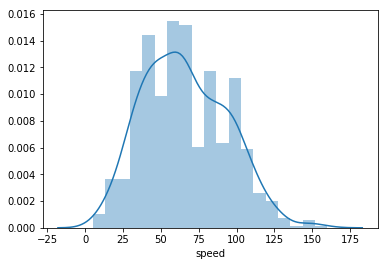

In [62]:
# seaborn hist
sb.distplot(pokemon['speed'])

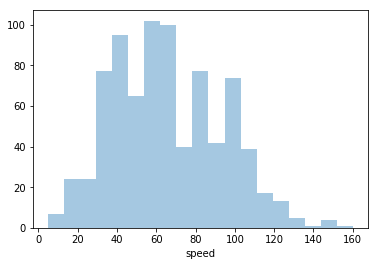

In [63]:
sb.distplot(pokemon['speed'], kde = False)

### 6. Discriptive Statistics, Outliers and Axis Limits

(array([139., 252., 206., 126.,  42.,  10.,   7.,   7.,   3.,   2.,   3.,
          3.,   1.,   1.,   1.,   0.,   0.,   1.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5]),
 <a list of 29 Patch objects>)

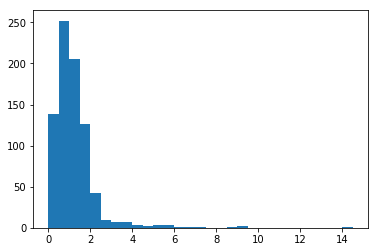

In [66]:
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins)

(0, 6)

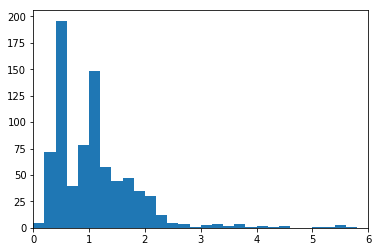

In [67]:
bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim(0,6)

### 7. Scales and Transformation

(array([504., 130.,  67.,  32.,  13.,  22.,   8.,   6.,   9.,   2.,   3.,
          1.,   1.,   1.,   0.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,
          1.,   2.,   2.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000.]),
 <a list of 25 Patch objects>)

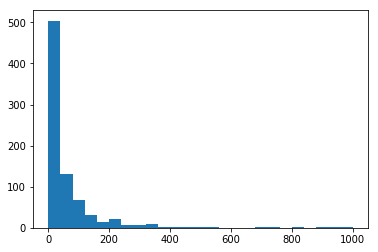

In [70]:
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)

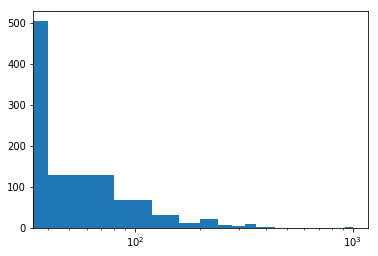

In [71]:
bins = np.arange(0, pokemon['weight'].max() + 40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')

In [72]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [73]:
# get a sense of how to set up the bin size
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

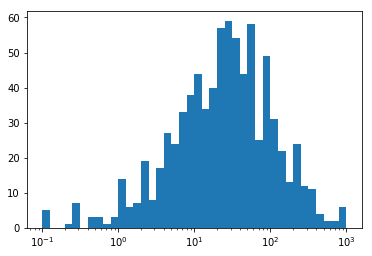

In [74]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')

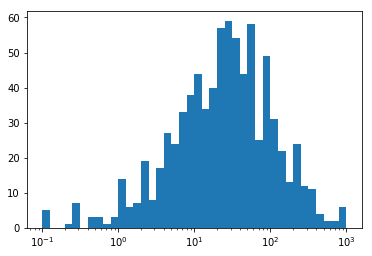

In [76]:
# use xticks to specify locations and labels in their natural units
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')

(0, 6)

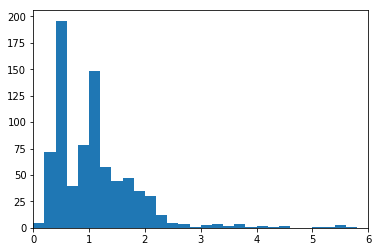

In [77]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0,6))

Text(0.5,0,'Weight (kg)')

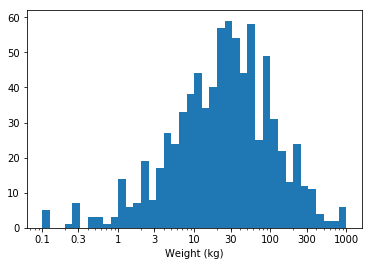

In [78]:
bins = 10 ** np.arange(-1, 3.0+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Weight (kg)')